In [53]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df= pd.read_csv("skygeni_sales_data.csv")
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [55]:
df.info()
df.describe()
df['outcome'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deal_id           5000 non-null   object
 1   created_date      5000 non-null   object
 2   closed_date       5000 non-null   object
 3   sales_rep_id      5000 non-null   object
 4   industry          5000 non-null   object
 5   region            5000 non-null   object
 6   product_type      5000 non-null   object
 7   lead_source       5000 non-null   object
 8   deal_stage        5000 non-null   object
 9   deal_amount       5000 non-null   int64 
 10  sales_cycle_days  5000 non-null   int64 
 11  outcome           5000 non-null   object
dtypes: int64(2), object(10)
memory usage: 468.9+ KB


outcome
Lost    2737
Won     2263
Name: count, dtype: int64

The dataset contains sales deal records including industry, region, deal amount, sales cycle duration, and deal outcomes.
These features allow analysis of win rate drivers, pipeline health, and deal behavior across segments.

In [56]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   deal_id           5000 non-null   object        
 1   created_date      5000 non-null   datetime64[ns]
 2   closed_date       5000 non-null   datetime64[ns]
 3   sales_rep_id      5000 non-null   object        
 4   industry          5000 non-null   object        
 5   region            5000 non-null   object        
 6   product_type      5000 non-null   object        
 7   lead_source       5000 non-null   object        
 8   deal_stage        5000 non-null   object        
 9   deal_amount       5000 non-null   int64         
 10  sales_cycle_days  5000 non-null   int64         
 11  outcome           5000 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 468.9+ KB


In [57]:
df['won_flag']=df['outcome'].apply(lambda x : 1 if x =='Won' else 0)

In [58]:
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,won_flag
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won,1
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won,1
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost,0
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won,1
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost,0


In [59]:
win_rate = df['won_flag'].mean()
print('Overall winrate =',win_rate)

Overall winrate = 0.4526


The overall win rate provides a baseline measure of sales performance and helps evaluate pipeline efficiency.

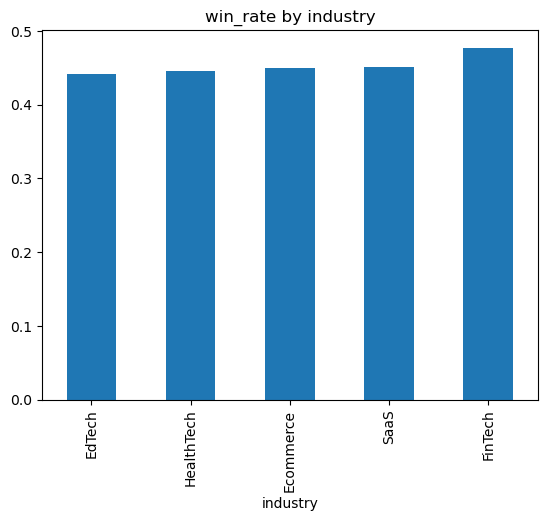

In [60]:
industry_win = df.groupby('industry')['won_flag'].mean().sort_values()
industry_win.plot(kind='bar')
plt.title('win_rate by industry')
plt.show()

Insight_1:
The win rate across industries shows moderate variation, with FinTech deals converting slightly better than other sectors, while EdTech shows comparatively lower conversion. However, the differences are not large, suggesting that industry alone may not be the primary driver of declining win rates.

why this matters : If one industry had significantly lower conversion rates, it could indicate poor product market fit or strong competition in that segment. Since win rates are relatively similar, the decline in overall win rate is likely influenced by other factors such as deal qualification, sales execution, or pipeline quality.

Action :Review messaging, pricing strategy, and competitive positioning in lower performing industries such as EdTech, while studying what works well in FinTech deals to replicate successful practices.

outcome           Lost        Won
lead_source                      
Inbound      53.961965  46.038035
Outbound     54.494382  45.505618
Partner      56.048387  43.951613
Referral     54.472843  45.527157


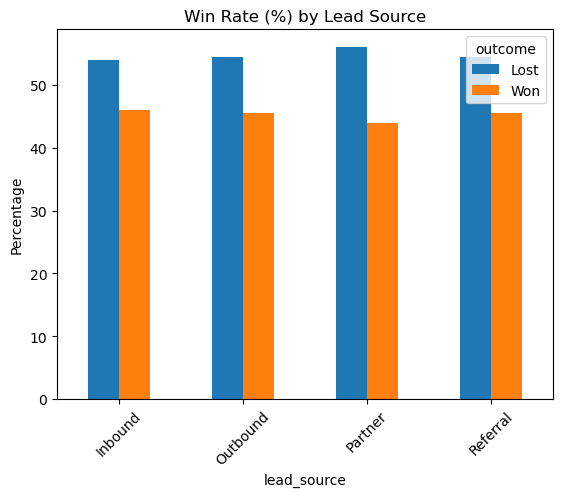

In [61]:
lead_pct = pd.crosstab(df['lead_source'], df['outcome'], normalize='index') * 100
print(lead_pct)
lead_pct.plot(kind='bar')
plt.title("Win Rate (%) by Lead Source")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()


Insight_2:
The win rate across different lead sources remains relatively consistent, with only small variations between inbound, outbound, referral, and partner channels. Partner-sourced deals show a slightly lower win rate compared to others, which may indicate differences in lead qualification or alignment with customer needs.

why it matters because Marketing spend should focus on channels that bring higher-quality leads.

Action:Increasing investment in high-performing lead sources and review low-performing ones.

sales_rep_id
rep_22    40.094340
rep_18    40.860215
rep_7     41.666667
rep_10    42.408377
rep_6     42.786070
rep_14    43.961353
rep_13    44.102564
rep_23    44.565217
rep_15    44.571429
rep_17    44.571429
rep_9     44.623656
rep_24    44.827586
rep_25    45.365854
rep_1     45.497630
rep_5     45.771144
rep_4     45.812808
rep_2     46.153846
rep_11    46.500000
rep_20    46.956522
rep_16    47.085202
rep_3     47.222222
rep_19    47.959184
rep_8     48.128342
rep_12    48.333333
rep_21    50.961538
Name: outcome, dtype: float64


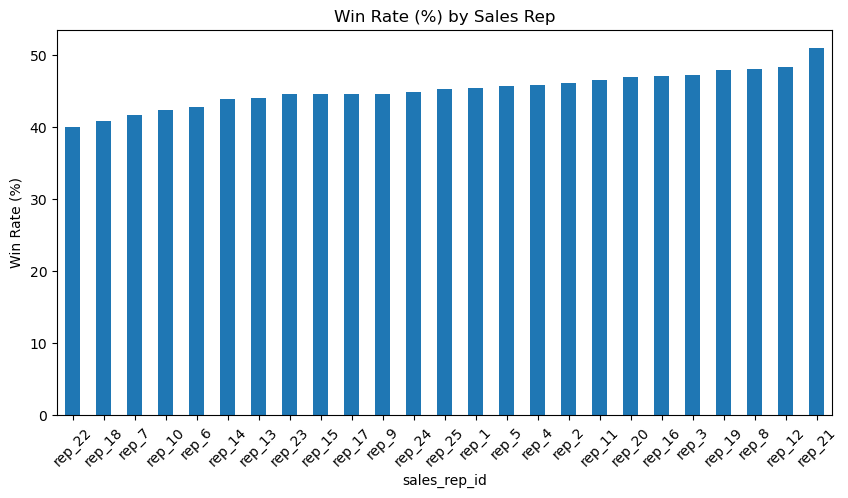

In [62]:
win_rate_rep = (
    df.groupby('sales_rep_id')['outcome']
      .apply(lambda x: (x == 'Won').mean() * 100)
      .sort_values()
)

print(win_rate_rep)

plt.figure(figsize=(10,5))
win_rate_rep.plot(kind='bar')
plt.title("Win Rate (%) by Sales Rep")
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.show()

Insight 3 :
The analysis of win rates by sales representative shows moderate variation in performance, with win rates ranging from approximately 40% to 51%. While some representatives consistently achieve higher conversion rates, the variation is not extreme, suggesting that individual rep performance contributes to win-rate differences but may not be the primary driver of the overall decline.

why this matters : Performance variation across reps can significantly impact overall win rate. Identifying underperforming segments enables targeted coaching, improved lead assignment, or process standardization.

Action : Investigate best practices used by high-performing reps and replicate them across the team. Provide coaching or pipeline support to lower-performing reps.


In [63]:
df.groupby('sales_rep_id')['deal_id'].count()

sales_rep_id
rep_1     211
rep_10    191
rep_11    200
rep_12    180
rep_13    195
rep_14    207
rep_15    175
rep_16    223
rep_17    175
rep_18    186
rep_19    196
rep_2     221
rep_20    230
rep_21    208
rep_22    212
rep_23    184
rep_24    203
rep_25    205
rep_3     216
rep_4     203
rep_5     201
rep_6     201
rep_7     204
rep_8     187
rep_9     186
Name: deal_id, dtype: int64

Because:

Low win rate + high volume = real issue

Low win rate + low volume = less critical

Metric 1:
    
Percentage of deals taking longer than normal to close

In [64]:
median_cycle = df['sales_cycle_days'].median()

stalled_deals = df[df['sales_cycle_days'] > median_cycle]

stalled_ratio = len(stalled_deals) / len(df)

print("Stalled Pipeline Ratio:", stalled_ratio)

Stalled Pipeline Ratio: 0.493


Stalled Pipeline Ratio measures the proportion of deals taking longer than the typical sales cycle.
A high ratio indicates potential inefficiencies or deal risks in the pipeline.

metric 2:

Total deal value tied to slow-moving deals.

In [65]:
revenue_at_risk = stalled_deals['deal_amount'].sum()
print("Revenue at Risk:", revenue_at_risk)

Revenue at Risk: 65903723


Revenue at Risk estimates how much potential revenue is tied up in slow-moving deals that have a higher probability of being lost.
This can help sales leaders prioritize deal reviews and interventions.

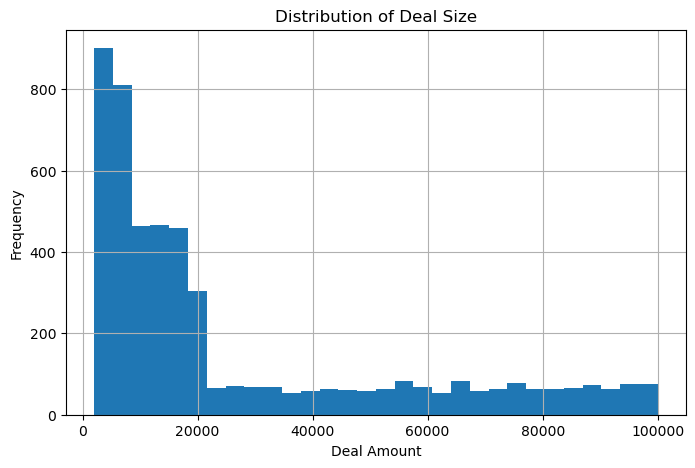

In [66]:
plt.figure(figsize=(8,5))
df['deal_amount'].hist(bins=30)
plt.title("Distribution of Deal Size")
plt.xlabel("Deal Amount")
plt.ylabel("Frequency")
plt.show()

In [67]:
df['deal_amount'].describe()


count      5000.000000
mean      26286.492800
std       27689.230136
min        2002.000000
25%        6611.000000
50%       14171.500000
75%       39062.250000
max      100000.000000
Name: deal_amount, dtype: float64

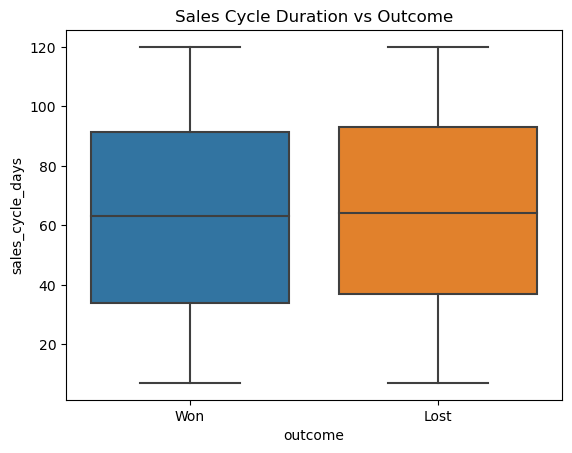

In [69]:
sns.boxplot(x='outcome', y='sales_cycle_days', data=df)
plt.title("Sales Cycle Duration vs Outcome")
plt.show()

In [70]:
df.groupby('outcome')['sales_cycle_days'].mean()


outcome
Lost    64.230179
Won     63.173221
Name: sales_cycle_days, dtype: float64

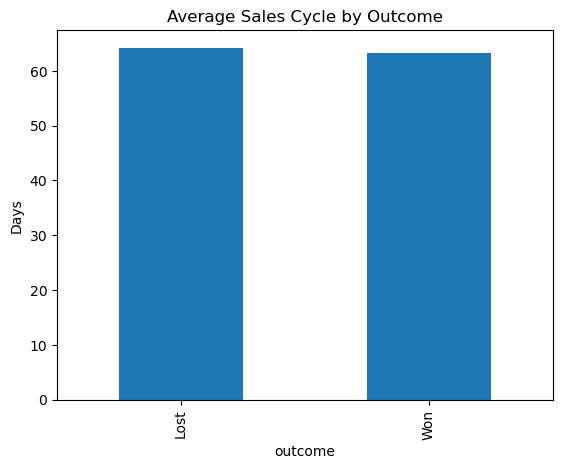

In [71]:
df.groupby('outcome')['sales_cycle_days'].mean().plot(kind='bar')
plt.title("Average Sales Cycle by Outcome")
plt.ylabel("Days")
plt.show()

In [72]:
df['deal_size_bucket'] = pd.qcut(df['deal_amount'], q=4, labels=["Small","Medium","Large","Very Large"])


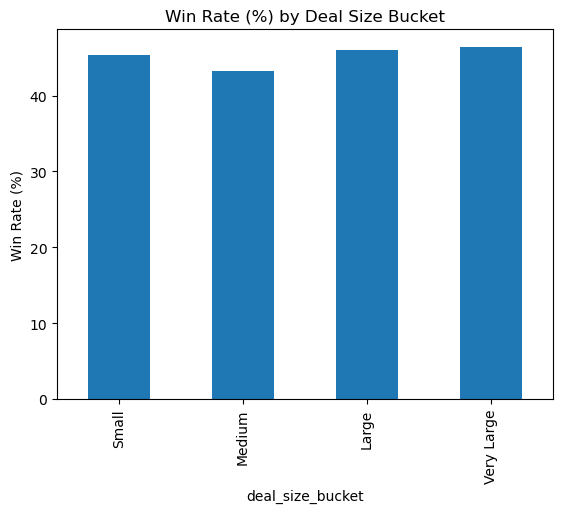

In [73]:
win_rate_bucket = (
    df.groupby('deal_size_bucket')['outcome']
      .apply(lambda x: (x=='Won').mean()*100)
)

win_rate_bucket.plot(kind='bar')
plt.title("Win Rate (%) by Deal Size Bucket")
plt.ylabel("Win Rate (%)")
plt.show()


In [81]:
lead_win = df.groupby('lead_source')['won_flag'].mean()*100
lead_win

lead_source
Inbound     46.038035
Outbound    45.505618
Partner     43.951613
Referral    45.527157
Name: won_flag, dtype: float64

In [82]:
industry_win = df.groupby('industry')['won_flag'].mean()*100


industry_win 

industry
Ecommerce     44.905660
EdTech        44.153226
FinTech       47.705443
HealthTech    44.554455
SaaS          45.154845
Name: won_flag, dtype: float64

In [83]:
region_win = df.groupby('region')['won_flag'].mean()*100
region_win 

region
APAC             44.927536
Europe           45.579886
India            45.723173
North America    44.794189
Name: won_flag, dtype: float64

In [84]:
rep_win = df.groupby('sales_rep_id')['won_flag'].mean()*100
rep_win

sales_rep_id
rep_1     45.497630
rep_10    42.408377
rep_11    46.500000
rep_12    48.333333
rep_13    44.102564
rep_14    43.961353
rep_15    44.571429
rep_16    47.085202
rep_17    44.571429
rep_18    40.860215
rep_19    47.959184
rep_2     46.153846
rep_20    46.956522
rep_21    50.961538
rep_22    40.094340
rep_23    44.565217
rep_24    44.827586
rep_25    45.365854
rep_3     47.222222
rep_4     45.812808
rep_5     45.771144
rep_6     42.786070
rep_7     41.666667
rep_8     48.128342
rep_9     44.623656
Name: won_flag, dtype: float64

In [85]:
driver_strength = pd.DataFrame({
    'Factor': ['Sales Rep', 'Lead Source', 'Industry', 'Region'],
    'Variation (%)': [
        rep_win.max()-rep_win.min(),
        lead_win.max()-lead_win.min(),
        industry_win.max()-industry_win.min(),
        region_win.max()-region_win.min()
    ]
})

driver_strength.sort_values('Variation (%)', ascending=False)


,Factor,Variation (%)
0,Sales Rep,10.867199
2,Industry,3.552217
1,Lead Source,2.086422
3,Region,0.928984


In [86]:
top_rep = rep_win.idxmax()
bottom_rep = rep_win.idxmin()

print("Top performing sales rep:", top_rep)
print("Lowest performing sales rep:", bottom_rep)


Top performing sales rep: rep_21
Lowest performing sales rep: rep_22
